## Student Information
Name: 

---


## **Instruction**
  
Welcome to NEAF DIP workshop!  
Here we prepare some widely used methods to let you practice, including:
1. Histogram Equalization
2. Mean blur, Median blur, Gaussian blur
3. Binary
4. HSV filter#抓取顏色
5. Morphological: erosion, dilation, open, close
6. Find contours

Those skills are very powerful and important skills, please enjoy learning and put them into good use :)

---

## **1. Histogram Equalization**
Histogram is the method to enhance image contrast.  
Please show the image grayscale histogram and do the equlization, and show the image result and histogram equalization result.  

<img src="md_picture/lena1.png" width="60%" heught="60%">

In [57]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

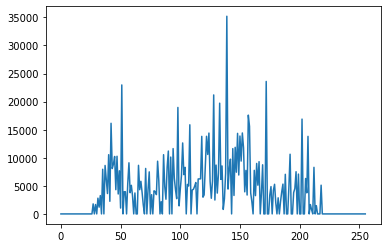

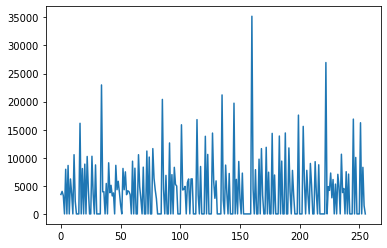

True

In [2]:
img = cv2.imread('input/lena.bmp', cv2.IMREAD_GRAYSCALE) # Read image as gray before doing histogram equalization.
img_ori = cv2.calcHist([img],[0],None,[256],[0,255])#build original histograms
equalize_img = cv2.equalizeHist(img)#input grayscale image and output histogram equalized image
img_equa = cv2.calcHist([equalize_img],[0],None,[256],[0,255])#build equalizeHist histograms

plt.plot(img_ori)
plt.show()
cv2.imwrite('output/img.bmp', img)

plt.plot(img_equa)
plt.show()
cv2.imwrite('output/equalize_img.bmp', equalize_img)
"""
cv2.imshow('img',img)
cv2.imshow('equalize_img',equalize_img)
key = cv2.waitKey(0)
"""

_keywords: plt.hist, cv2.equalizeHist, cv2.calcHist_

---

Mean blur, Gaussian blur, Median blur## **2. **
Blur is a method to deal with the noise on the image.
Please input the image and use different kernel size to show blur result.

<img src="md_picture/2.png" width="60%" heught="60%">
<img src="md_picture/3.png" width="60%" heught="60%">

In [9]:
img_noise = cv2.imread('input/lena_noise.png', cv2.IMREAD_GRAYSCALE)

# Blur the image by three methods.

img_mean_blur = cv2.blur(img_noise,(5,5))
img_gaussian_blur = cv2.GaussianBlur(img_noise,(5,5),0)
img_median_blur = cv2.medianBlur(img_noise,5)

# save result
cv2.imwrite('output/img_mean_blur.png', img_mean_blur)
cv2.imwrite('output/img_gaussian_blur.png', img_gaussian_blur)
cv2.imwrite('output/img_median_blur.png', img_median_blur)

True

### Question:
1. What is the difference between three methods? When to use them?
Mean blur: Sum up the surrounding pixel values and take their average, then replace the pixel at the noisy location with the obtained value. Its purpose is to suppress higher frequency signals within the range. If the grayscale values within the range don't vary much, meaning the signals are low-frequency, mean filtering will yield better results.

Median blur: Sort the neighboring pixel values and select the middle value, then replace the pixel at the noisy location with the obtained value. This is known as median filtering. It can preserve more detailed edges.

Gaussian blur: Gaussian filtering takes into account the weights of nearby pixels when computing the average. These weights are calculated using a two-dimensional Gaussian function, considering that noise within a certain range follows a Gaussian distribution. Gaussian filtering is commonly used to suppress noise in photos. 
2. What is the difference if the kernel size changes?  
The larger the kernel size, the stronger the blurring effect.

_keywords: cv2.blur, cv2.GaussianBlur, cv2.medianBlur_

---

## **3. Binary**
Binary is a method to transfer greyscale to 0 (black) and 255 (white) only.  
Please do the image binary to seperate pad and background.  

<img src="md_picture/4.png" width="60%" heught="60%">

In [13]:
binary1 = cv2.imread('input/binary_task1.bmp', cv2.IMREAD_GRAYSCALE)
# Do the image binary to seperate pad and background
# Set grayscale values below the threshold to 0, others to maximum grayscale value. >127 = 255, <127 = 0.
ret, thres1 = cv2.threshold(binary1, 127, 255, cv2.THRESH_BINARY)
print("ret",ret)
print("thres1",thres1)
# save result
cv2.imwrite('output/binary_task1.bmp', thres1)

ret 127.0
thres1 [[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]


True

In [19]:
binary2 = cv2.imread('input/binary_task2.bmp', cv2.IMREAD_GRAYSCALE)
# Do the image binary to seperate pad and background
#ret, thres2 = cv2.threshold(binary2, 128, 255, cv2.THRESH_BINARY)
ret, thres2 = cv2.threshold(binary2,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("ret",ret)
print("thres1",thres2)
# save result
cv2.imwrite('output/binary_task2.bmp', thres2)

ret 141.0
thres1 [[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


True

In [20]:
binary3 = cv2.imread('input/binary_task3.bmp', cv2.IMREAD_GRAYSCALE)

# Do the image binary to seperate pad and background
ret, thres3 = cv2.threshold(binary3,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print("ret",ret)
print("thres1",thres3)
# save result
cv2.imwrite('output/binary_task3.bmp', thres3)

ret 119.0
thres1 [[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]


True

### Questions:
1. What are the limits of this methods?
(1)Sensitive to Lighting Conditions
(2)Limited to Two Classes
(3)Threshold Selection
2. What if the light source is not uniform? Is this method still work? How to improve it?  
(1)Adaptive Thresholding
(2)Normalization

_keywords: cv2.threshold_

---

## **4. HSV filter**
This method could extract the the interested part by color.  
Please crop the yellow or blue boxes and its surrounding in the image.

<img src="md_picture/5.png" width="30%" heught="30%">

### Steps:
1. Transfer color to HSV.
2. Setting the color range and filter the image. (output the color image in the setting range)
3. Binary the image, find the left-top and right-bottom coordinate.
4. Crop the image by the coordinate.  

- Noted: Blur, histogram equalization methods could be used if needed.  

In [53]:
import cv2
import numpy as np

# Yellow box.
yellow = cv2.imread('input/yellow.jpg')
yellow = cv2.resize(yellow, None, fx=0.5, fy=0.5)
# Image denoising and smoothing
#blur_image = cv2.medianBlur(yellow, 3)
# Step 1. Transfer color to HSV
hsv_image = cv2.cvtColor(yellow, cv2.COLOR_BGR2HSV)

# Step 2. Setting the color range and filter the image.
mask = cv2.inRange(hsv_image, (26, 43, 46), (34, 255, 255))
masked_img = cv2.add(yellow, np.zeros(np.shape(yellow), dtype=np.uint8), mask=mask)
cv2.imwrite('output/masked_img.jpg', masked_img)

# Step 3. Binary the image, find the left-top and right-bottom coordinate (x, y, w, h) or (x1, x2, y1, y2).
gray_image = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
cv2.imwrite("output/binary_image.jpg",binary_image)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

x, y, w, h = cv2.boundingRect(contours[0])#contours輪廓點集合output四個值，x，y是矩陣左上點的坐標，w，h是矩陣的寬和高
left_top = (x, y)
right_bottom = (x + w, y + h)
#Step 4. Crop the image by the coordinate.
crop_edge = 20  # surrounding 20 pixels 
cropHSV_yellow = yellow[y-crop_edge: y+h+crop_edge, x-crop_edge: x+w+crop_edge]   # take (x, y, w, h) as example.

#save result
cv2.imwrite('output/cropHSV_yellow.jpg', cropHSV_yellow)
cv2.imshow("cropHSV_yellow",cropHSV_yellow)
cv2.waitKey(0)

-1

In [56]:
import cv2
import numpy as np

# Load the image
blue = cv2.imread('input/blue.jpg')
blue = cv2.resize(blue, None, fx=0.4, fy=0.4)

# Image denoising and smoothing
blur_image = cv2.medianBlur(image, 3)

# Step 1: Transfer color to HSV
hsv_image = cv2.cvtColor(blur_image, cv2.COLOR_BGR2HSV)

# Step 2: Setting the color range and filter the image for blue
lower_bound = np.array([100, 50, 50])  # Lower HSV range for blue color
upper_bound = np.array([130, 255, 255])  # Upper HSV range for blue color
mask = cv2.inRange(hsv_image, lower_bound, upper_bound)
masked_img = cv2.add(blue, np.zeros(np.shape(blue), dtype=np.uint8), mask=mask)

# Step 3: Binary the image and find coordinates
gray_image = cv2.cvtColor(masked_img, cv2.COLOR_BGR2GRAY)
_, binary_image = cv2.threshold(gray_image, 1, 255, cv2.THRESH_BINARY)
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
#RETR_EXTERNAL只檢測外輪廓
#cv2.CHAIN_APPROX_SIMPLE壓縮水平方向，垂直方向，對角線方向的元素，
# 只保留該方向的終點座標，例如一個矩形輪廓只需4個點來儲存輪廓資訊

x, y, w, h = cv2.boundingRect(contours[0])#contours輪廓點集合output四個值，x，y是矩陣左上點的坐標，w，h是矩陣的寬和高
left_top = (x, y)
right_bottom = (x + w, y + h)

# Step 4: Crop the image by the coordinates
crop_edge = 20  # surrounding 20 pixels
crop_blue = image[y - crop_edge: y + h + crop_edge, x - crop_edge: x + w + crop_edge]

# Save result
cv2.imwrite('output/cropHSV_blue.jpg', crop_blue)

True

---

## **5. Morphological: erosion, dilation, open, close**

Those methods help to denoise, enhance the features.   
Please use these methods to fill up the lines of the image created in the previous section.

<img src="md_picture/6.png" width="60%" heught="60%">

In [34]:
hsv_yellow = cv2.imread('output/cropHSV_yellow.jpg')
# Try to use erosion, dilation, open, close to fill up the lines.
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)) #ksize=2,2
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1)) #ksize=1,1
result = cv2.dilate(hsv_yellow,dilate_kernel,iterations=1)
result = cv2.erode(result,erode_kernel,iterations=2)
# save result
cv2.imwrite('output/morpho_yellow.jpg', result)

True

In [38]:
hsv_blue = cv2.imread('output/cropHSV_blue.jpg')
# Try to use erosion, dilation, open, close to fill up the lines.
dilate_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(2,2)) #ksize=2,2
erode_kernel = cv2.getStructuringElement(cv2.MORPH_RECT,(1,1)) #ksize=1,1
result = cv2.dilate(hsv_blue,dilate_kernel,iterations=1)
result = cv2.erode(result,erode_kernel,iterations=1)
# save result
cv2.imwrite('output/morpho_blue.jpg', result)

True

_keywords: cv2.erode, cv2.dilate, cv2.morpholopyEx_

---

## **6. Find countours**

Use package to find the contours in the image.

Practice:
1. Find the pad and probemark contours in the pad series images.
2. Calculate the countours area.

<img src="md_picture/7.png" width="60%" heught="60%">

In [38]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
pad_task1 = cv2.imread('input/binary_task1.bmp')
gray = cv2.cvtColor(pad_task1, cv2.COLOR_BGR2GRAY)
ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)
cv2.imwrite('output/THRESH_BINARY_INV.bmp', thresh)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(pad_task1,contours,1,(0,255,0),3,lineType=cv2.LINE_AA)

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', pad_task1)
cnt = contours[1]
pad_area = area = cv2.contourArea(cnt)
print('The pad area is ', pad_area)
#print('The probe mark area is ', probemark_area)

The pad area is  145.5


_keywords: cv2.findContours(找輪廓), cv2.contourArea_(算輪廓面積)

---

### **Extra Challenge**

Try to find the contours of circular workspace in the image.  
You can use other DIP methods from other packages.

<img src="md_picture/8.png" width="50%" height="50%">

- Hint : The light source isn't uniform, try to eliminate the the influence of the light source.

In [60]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('input/extra_1.bmp')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
# Find the contour of circular workspace in the image.

binary  = cv2.adaptiveThreshold(gray, 127, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, -30)
cv2.imwrite('output/THRESH_BINARY_INV.bmp', binary)
contours, hierarchy = cv2.findContours(binary, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(img,contours,-1,(0,0,255),3,lineType=cv2.LINE_AA)
# save and print result
cv2.imwrite('output/pad_task2_cont.bmp', img)
cnt = contours[1]
pad_area = area = cv2.contourArea(cnt)



In [ ]:
img = cv2.imread('input/extra_2.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)

In [ ]:
img = cv2.imread('input/extra_3.bmp')

# Find the contour of circular workspace in the image.

"""
Your code here
"""

# save and print result
cv2.imwrite('output/pad_task1_cont.bmp', result)